# Upper Confidence Bound (UCB)  


Import the libraries

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Loading the data set

In [20]:
df=pd.read_csv(".\\Ads_CTR_Optimisation.csv")

Implementing the UCB

In [21]:
import math
N=500
d=10
ads_selected=[]
number_selection=[0]*d
sum_rewards=[0]*d
total_rewards=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if number_selection[i]>0:
            avg=sum_rewards[i]/number_selection[i]
            delta_i=math.sqrt(3/2*math.log (n+1)/number_selection[i])
            upper_bound=avg+delta_i
        else:
            upper_bound=1e400 
        if(upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_selection[ad]+=1
    reward=df.values[n,ad]
    sum_rewards[ad]=sum_rewards[ad]+reward
    total_rewards=total_rewards+reward


Visualizing the results

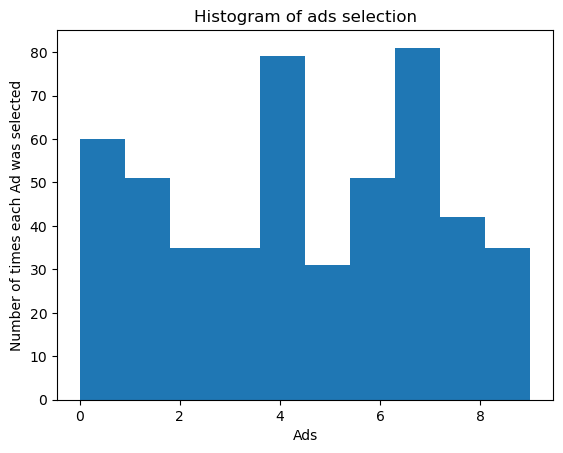

In [22]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()